# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import http://localhost:8888/notebooks/WeatherPy/WeatherPy.ipynb #numpy as np
import requests
import time
from scipy.stats import linregress
import numpy as np
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
# cityw = requests.get(query_url)
# citywj= cityw.json()
# pprint(citywj, indent=4)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | artyom
Processing Record 4 of Set 1 | fulitun
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | harnosand
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | lata
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | samatau
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | agadir
Processing Record 19 of Set 1 | nalut
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | beringovskiy
Proce

Processing Record 34 of Set 4 | zyryanovsk
Processing Record 35 of Set 4 | corum
Processing Record 36 of Set 4 | ust-kulom
Processing Record 37 of Set 4 | darab
Processing Record 38 of Set 4 | cervo
Processing Record 39 of Set 4 | diamantino
Processing Record 40 of Set 4 | perth
Processing Record 41 of Set 4 | freeport
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | onega
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | okha
Processing Record 46 of Set 4 | cap malheureux
Processing Record 47 of Set 4 | kasongo-lunda
Processing Record 48 of Set 4 | chicama
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 0 of Set 5 | cockburn town
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | dongying
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | hervey bay
Processing Record 5 of Set 5 | narbonne
Processing Record 6 of Set 5 | muros
Processing Record 7 of Set 5 | 

Processing Record 25 of Set 8 | esperance
Processing Record 26 of Set 8 | kumluca
Processing Record 27 of Set 8 | magole
Processing Record 28 of Set 8 | palmer
Processing Record 29 of Set 8 | santiago de cao
Processing Record 30 of Set 8 | carmo do rio verde
Processing Record 31 of Set 8 | lodja
Processing Record 32 of Set 8 | sao luiz gonzaga
Processing Record 33 of Set 8 | araxa
Processing Record 34 of Set 8 | uglegorsk
Processing Record 35 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 36 of Set 8 | kenai
Processing Record 37 of Set 8 | brae
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | sao luis
Processing Record 40 of Set 8 | jiaonan
Processing Record 41 of Set 8 | abha
Processing Record 42 of Set 8 | maumere
Processing Record 43 of Set 8 | monroe
Processing Record 44 of Set 8 | muravlenko
Processing Record 45 of Set 8 | alyangula
Processing Record 46 of Set 8 | gap
Processing Record 47 of Set 8 | taoudenni
Processing Record 48 of Se

Processing Record 16 of Set 12 | boyabat
Processing Record 17 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 18 of Set 12 | mayo
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | sokolo
Processing Record 22 of Set 12 | jashpurnagar
Processing Record 23 of Set 12 | suntar
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | oistins
Processing Record 26 of Set 12 | tsiroanomandidy
Processing Record 27 of Set 12 | mackay
Processing Record 28 of Set 12 | hamilton
Processing Record 29 of Set 12 | alcaniz
Processing Record 30 of Set 12 | west wendover
Processing Record 31 of Set 12 | leshukonskoye
Processing Record 32 of Set 12 | narsaq
Processing Record 33 of Set 12 | capula
Processing Record 34 of Set 12 | utiroa
City not found. Skipping...
Processing Record 35 of Set 12 | iquitos
Processing Record 36 of Set 12 | at-bashi
Processing Record 37 of Set 12 | gerash
Processing Record 38 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,14.49,94,57,1.68,TL,1689102781
1,laguna,38.4210,-121.4238,34.24,34,0,3.09,US,1689102781
2,artyom,40.4723,50.3330,24.08,72,59,8.02,AZ,1689102782
3,rikitea,-23.1203,-134.9692,22.71,70,18,5.47,PF,1689102783
4,harnosand,62.6323,17.9379,19.01,81,6,3.99,SE,1689102562


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,14.49,94,57,1.68,TL,1689102781
1,laguna,38.4210,-121.4238,34.24,34,0,3.09,US,1689102781
2,artyom,40.4723,50.3330,24.08,72,59,8.02,AZ,1689102782
3,rikitea,-23.1203,-134.9692,22.71,70,18,5.47,PF,1689102783
4,harnosand,62.6323,17.9379,19.01,81,6,3.99,SE,1689102562


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

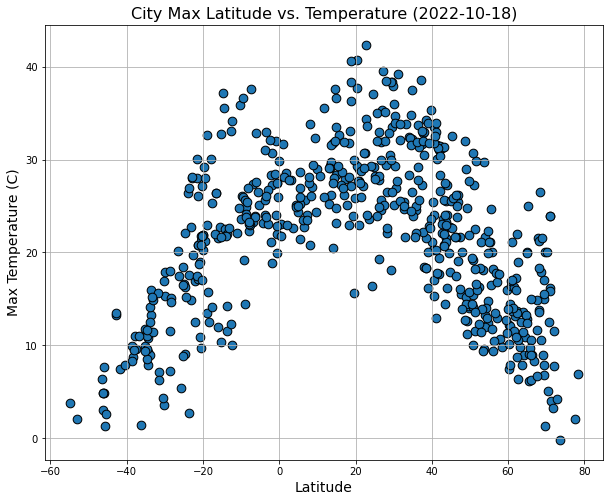

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y, edgecolors='black', s=75)

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Max Temperature (C)", fontsize=14)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

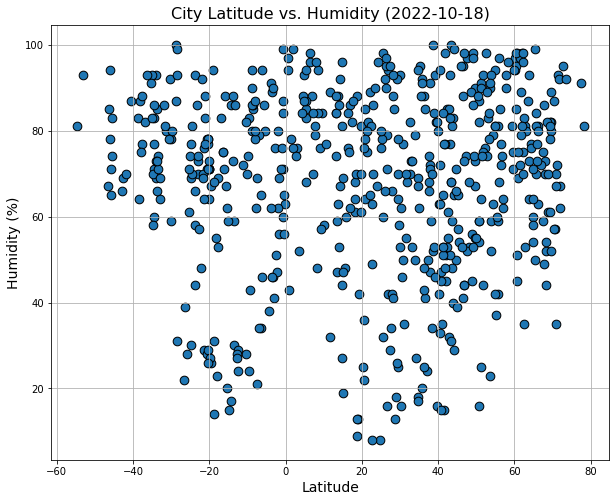

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y_hum = city_data_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y_hum, edgecolors='black', s=75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Humidity (%)", fontsize=14)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

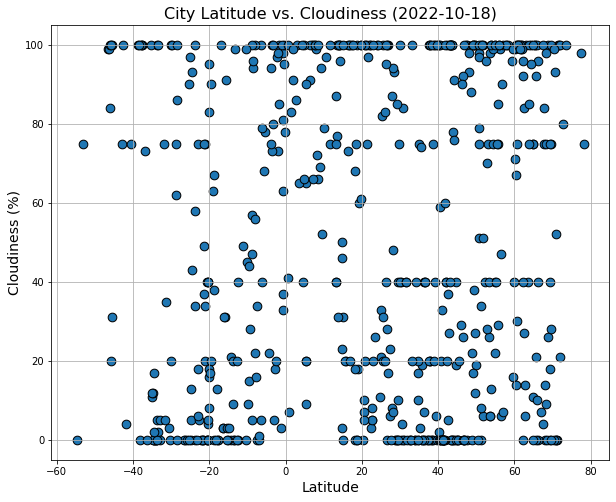

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y_cloud, edgecolors='black', s=75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Cloudiness (%)", fontsize=14)

plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

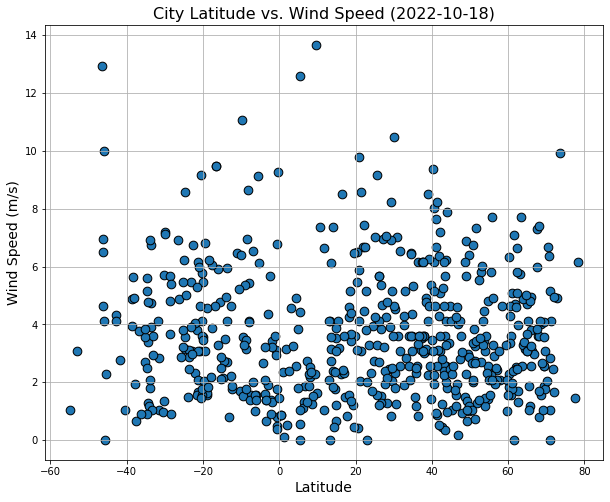

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y_wind, edgecolors='black', s=75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Wind Speed (m/s)", fontsize=14)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def line_regression(x, y, coord, y_label, title, figure):
    
    #linear regression
    (slope,intercept,rvalue, pvalue, intercept_stderr) = linregress(x, y)
    regress_values= x*slope+intercept
    line_anno = "y= " + str(round(slope, 3)) + "x + " + str(round(intercept, 2))
    
    #plot figure and scatter
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, s=75)
    
    #Labels
    plt.xlabel("Latitude", fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(f"{title} Hemisphere: Latitude vs. {y_label} (2022-10-18)", fontsize=16)
    
    #plot linear regression line
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_anno, coord, fontsize=15, color="red")
    
    #print the r-squared value
    print(f"The r-value is: {rvalue**2}")
    # Save the figure
    plt.savefig(f"output_data/{figure}.png")
    #show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[(city_data_df["Lat"]>=0)]
northern_hemi_df = northern_hemi.reset_index().set_index(["City_ID"])


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,laguna,38.4210,-121.4238,34.24,34,0,3.09,US,1689102781
2,artyom,40.4723,50.3330,24.08,72,59,8.02,AZ,1689102782
4,harnosand,62.6323,17.9379,19.01,81,6,3.99,SE,1689102562
6,lata,40.1629,-8.3327,21.15,63,2,3.47,PT,1689102785
8,barrow,71.2906,-156.7887,4.01,93,100,4.12,US,1689102786


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"]<0)]
southern_hemi_df = southern_hemi.reset_index().set_index(["City_ID"])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,14.49,94,57,1.68,TL,1689102781
3,rikitea,-23.1203,-134.9692,22.71,70,18,5.47,PF,1689102783
5,hermanus,-34.4187,19.2345,9.33,71,0,3.38,ZA,1689102785
7,port alfred,-33.5906,26.8910,13.32,74,2,3.90,ZA,1689102786
9,mataura,-46.1927,168.8643,3.06,94,84,4.62,NZ,1689102787


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.46956763107221966


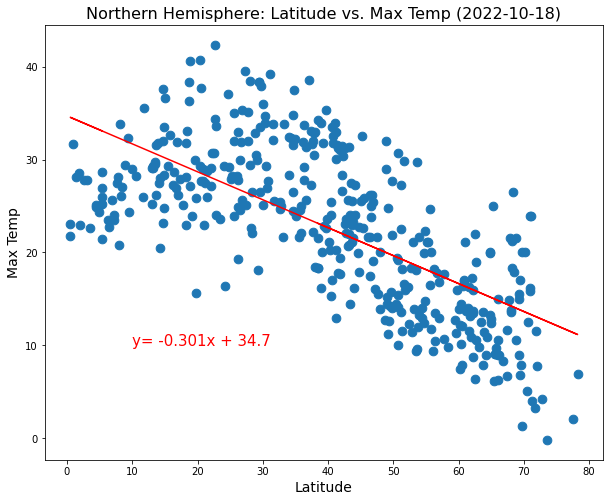

In [15]:
# Linear regression on Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north = northern_hemi_df["Max Temp"]
line_regression(x_north, y_north, (10, 10), "Max Temp", "Northern", "N_Temp")

The r-value is: 0.5836370552479531


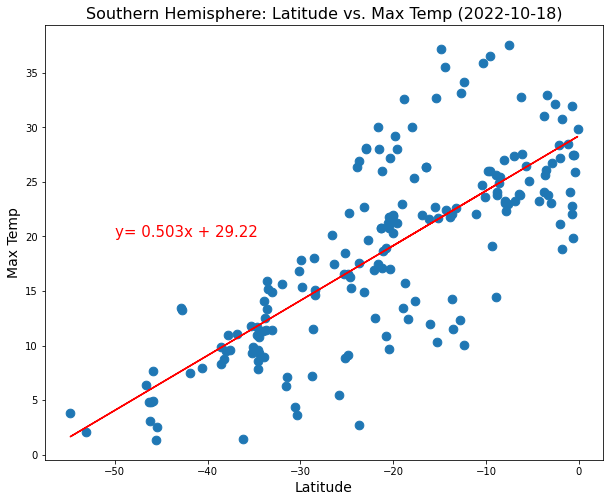

In [16]:
# Linear regression on Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south = southern_hemi_df["Max Temp"]
line_regression(x_south, y_south, (-50, 20), "Max Temp", "Southern", "S_Temp")

**Discussion about the linear relationship:** Both of the r-squared values for the Northern and Southern Hemispheres are above .4, therefore indicate a correlation between Max Temperature and Latitude. 

For the Northern Hemisphere, there is a negative correlation from the latitude values of 0 to 80. This means that the further away we get from the equater, the colder it will get. (Or more literally, the further from the equater the lower the max temp)

For the Southern Hemisphere, the is a positive correlation from the latitude values of -60 to 0. This means, despite the opposite correlation from the Northern Hemisphere, that the further we get from the equater, the colder it will get. (Or more literally, the closer to the equater the higher the max temp)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004637934742923439


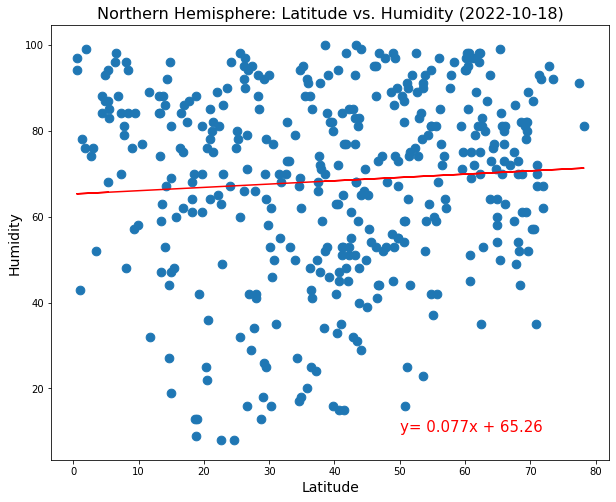

In [17]:
# Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north_hum= northern_hemi_df["Humidity"]
line_regression(x_north, y_north_hum, (50, 10), "Humidity", "Northern", "N_Hum")

The r-value is: 0.04708148111836526


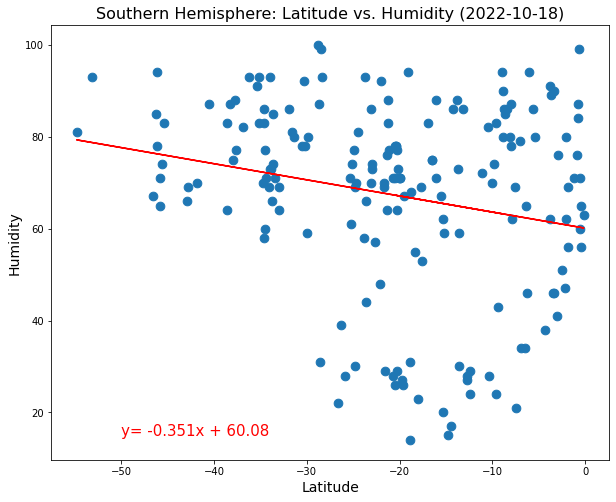

In [18]:
# Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south_hum = southern_hemi_df["Humidity"]
line_regression(x_south, y_south_hum, (-50, 15), "Humidity", "Southern", "S_Hum")

**Discussion about the linear relationship:** With a .005 r-squared value in the Northern Hemisphere and a .05 r-squared value in the Southern Hemisphere, there is a low correlation between Latitude and Humidity. 

Despite low correlation, the Northern Hemisphere seems to indicate a slight upward trend and the Southern Hemisphere indicates a slight downward trend. Along with the visual of both graphs having a large amount of points towards the top of the graph, we can take these trends as a possibility that there is a wider range of humidity towards the equater. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 1.1211541478083468e-06


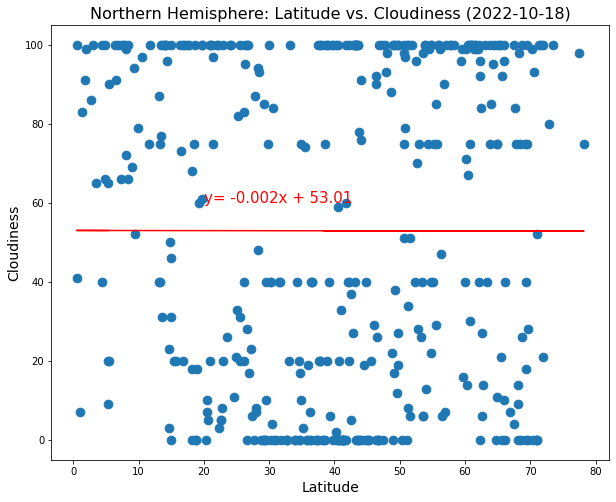

In [19]:
# Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north_cloud = northern_hemi_df["Cloudiness"]
line_regression(x_north, y_north_cloud, (20, 60), "Cloudiness", "Northern", "N_Cloud")

The r-value is: 0.0022325750171788786


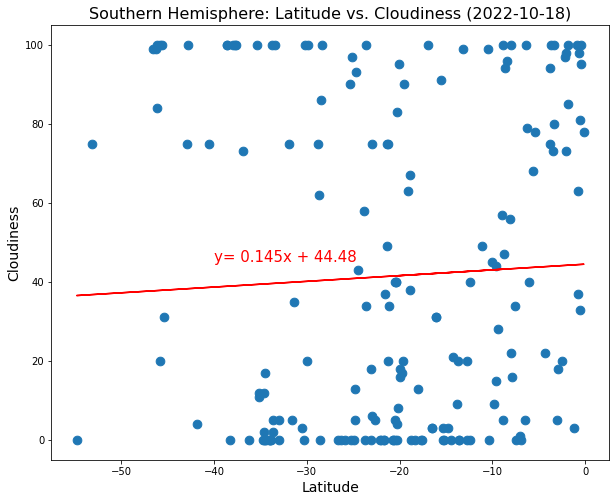

In [20]:
# Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south_cloud = southern_hemi_df["Cloudiness"]
line_regression(x_south, y_south_cloud, (-40, 45), "Cloudiness", "Southern", "S_Cloud")

**Discussion about the linear relationship:** With a .000001 r-squared value in the Northern Hemisphere and a .002 r-squared value in the Southern Hemisphere, there is a low correlation between Latitude and Cloudiness.

Despite low correlation, there are still some conclusions we can come to. This low correlation would lead us to believe that cloudiness does not depend on where we are at in regards to the equator. Cloudiness may depend more on other factors besides latitude. For instance, it may be beneficial to look into amount of cloudiness and the landscape or the nearness to the ocean. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00029126539037462306


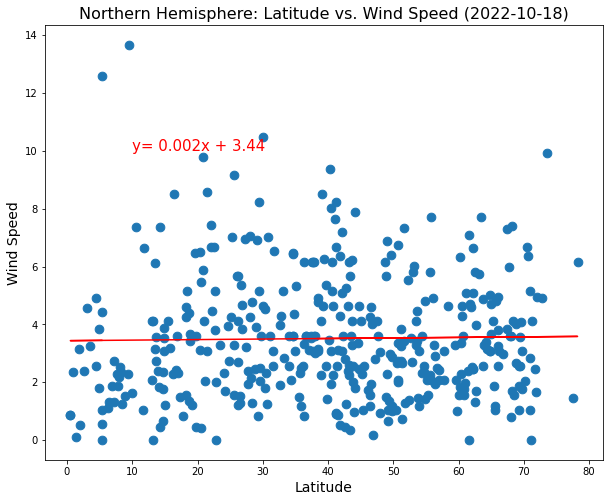

In [21]:
# Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north_wind = northern_hemi_df["Wind Speed"]
line_regression(x_north, y_north_wind, (10,10), "Wind Speed", "Northern", "N_Wind")

The r-value is: 0.012074652828578208


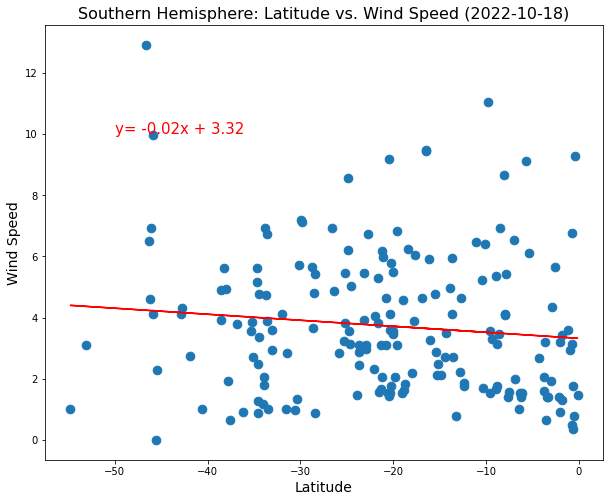

In [22]:
# Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south_wind = southern_hemi_df["Wind Speed"]
line_regression(x_south, y_south_wind, (-50, 10), "Wind Speed", "Southern", "S_Wind")

**Discussion about the linear relationship:** With a .0003 r-squared value in the Northern Hemisphere and a .01 r-squared value in the Southern Hemisphere, there is a very low correlation between Latitude and Wind Speed.

Despite low correlation, there are still some conclusions we can come to. In both Hemispheres, there appears to be far more cities with lower windspeed than higher. It might again be a good next step to compare Wind Speed to other factors besides Latitude. The first factors I would look into would be proximity to large bodies of water and elevation.